In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

The data we have is an 28x28 matrix of pixels and we have to flatten it to convert it into a 1D matrix with 784 elements(28*28).

In [3]:
x_train = x_train/255
x_test = x_test/255

In [4]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(120, activation='tanh'),
    keras.layers.Dense(10, activation="sigmoid")
])
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2283 - accuracy: 0.9323
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0963 - accuracy: 0.9701
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0682 - accuracy: 0.9779
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0516 - accuracy: 0.9839
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0409 - accuracy: 0.9864
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0322 - accuracy: 0.9895
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0268 - accuracy: 0.9909
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0217 - accuracy: 0.9927
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0200 - accuracy: 0.9936
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.016

In [5]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0846 - accuracy: 0.9772


[0.08463896811008453, 0.9771999716758728]

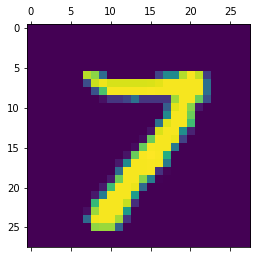

In [6]:
plt.matshow(x_test[34])

In [7]:
y_predicted = model.predict(x_test)

In [8]:
np.argmax(y_predicted[34])

7

In [9]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [10]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

Text(0.5, 42.0, 'Predicted')

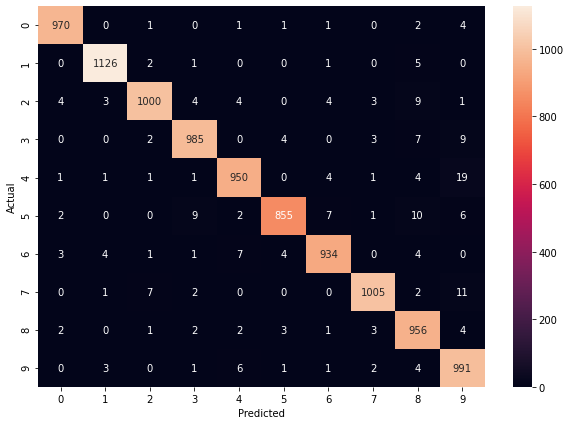

In [11]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dense(10, activation="sigmoid")
])
model.compile(
    optimizer='RMSprop', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
 742/1875 [==========>...................] - ETA: 3s - loss: 0.3570 - accuracy: 0.8956

KeyboardInterrupt: 

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(120, activation='softmax'),
    keras.layers.Dense(10, activation="sigmoid")
])
model.compile(
    optimizer='Adagrad', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train, y_train, epochs=10)

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='selu'),
    keras.layers.Dense(10, activation="sigmoid")
])
model.compile(
    optimizer='Adamax', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train, y_train, epochs=10)

In [ ]:
model.evaluate(x_test, y_test)